# YOLO Label Conversion and Visualization

This script demonstrates how to convert label files from LabelMe to YOLO format, and then visualize the results using matplotlib. The following libraries are used:

- `labelme2yolo`: A module to convert LabelMe annotations to YOLO format.
- `json` and `os`: Built-in Python libraries for handling JSON data and operating system functionalities, respectively.
- `ultralytics.YOLO`: A library to work with YOLO (You Only Look Once) models.
- `matplotlib.pyplot`: A plotting library used for visualization.
- `PIL.Image`: A library for image processing.

In [1]:
import labelme2yolo
import json
import os
from ultralytics import YOLO
from matplotlib import pyplot as plt
import matplotlib.image as img
from matplotlib.pyplot import figure
from PIL import Image

print(os.getcwd())

/Users/elenalickel/Desktop/EY_Challenge/EY_Challengev2


# JSON File Processing and Image Path Modification

This script processes JSON files in a specified folder to modify the `imagePath` attribute. The following steps are performed:

1. Iterate over all JSON files in the specified folder.
2. Open and read each JSON file.
3. Check if the `imagePath` attribute exists.
4. Modify the `imagePath` attribute to only include the filename, removing any preceding path.
5. Save the modified data back to the JSON file.
6. Print the contents of a specific JSON file to verify the changes.

In [2]:
folder_path = 'Intersecting_Batches-4'

# Iterate over all files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.json'):  # Check if the file is a JSON file
        file_path = os.path.join(folder_path, filename)

        # Open and read the JSON file
        with open(file_path, 'r') as file:
            data = json.load(file)

        # Check if 'ImagePath' exists in the dictionary and modify it
        if 'imagePath' in data:
            data['imagePath'] = data['imagePath'].split('/')[-1]

        # Save the modified data back to the JSON file
        with open(file_path, 'w') as file:
            json.dump(data, file, indent=4)

print("Processing complete. Image paths have been updated.")

file_path = 'Intersecting_Batches-4/tile_0_30.json'

# Open and read the JSON file
with open(file_path, 'r') as file:
    data = json.load(file)

# Print the contents of the JSON file
data['imagePath']


Processing complete. Image paths have been updated.


'tile_0_30.tif'

In [3]:
# Open and read the JSON file
with open(file_path, 'r') as file:
    data = json.load(file)
# Print the contents of the JSON file
data

{'version': '5.4.1',
 'flags': {},
 'shapes': [{'label': '2',
   'points': [[230.203821656051, 14.280254777070073],
    [302.81528662420385, 90.07643312101912]],
   'group_id': None,
   'description': '',
   'shape_type': 'rectangle',
   'flags': {},
   'mask': None},
  {'label': '2',
   'points': [[303.45222929936307, 16.19108280254778],
    [367.14649681528664, 81.79617834394905]],
   'group_id': None,
   'description': '',
   'shape_type': 'rectangle',
   'flags': {},
   'mask': None},
  {'label': '2',
   'points': [[366.5095541401274, 18.73885350318472],
    [455.04458598726114, 79.88535031847135]],
   'group_id': None,
   'description': '',
   'shape_type': 'rectangle',
   'flags': {},
   'mask': None},
  {'label': '2',
   'points': [[346.12738853503186, 90.07643312101912],
    [407.27388535031844, 120.64968152866243]],
   'group_id': None,
   'description': '',
   'shape_type': 'rectangle',
   'flags': {},
   'mask': None},
  {'label': '2',
   'points': [[281.79617834394907, 118.

# TIFF to JPEG Conversion Script

This script converts all TIFF files in a specified input directory to JPEG format and saves them to an output directory. The following steps are performed:

1. Check if the output directory exists, and create it if it doesn't.
2. Iterate through all files in the input directory.
3. For each TIFF file, open and convert it to JPEG format.
4. Save the converted JPEG file to the output directory.

In [56]:
from PIL import Image
import os

def convert_tif_to_jpeg(input_dir, output_dir):
    """
    Converts all TIFF files in the input directory to JPEG format,
    saving them to the output directory.
    """
    # Create the output directory if it doesn't exist
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Iterate through all files in the input directory
    for filename in os.listdir(input_dir):
        if filename.endswith(".tif") or filename.endswith(".tiff"):
            # Construct the full file path
            input_path = os.path.join(input_dir, filename)
            output_path = os.path.join(output_dir, filename.rsplit('.', 1)[0] + '.jpg')
            
            # Open the image, convert and save as JPEG
            try:
                with Image.open(input_path) as img:
                    img.convert('RGB').save(output_path, "JPEG")
                #print(f"Converted {filename} to JPEG and saved to {output_path}")
            except Exception as e:
                #print(f"Failed to convert {filename}: {e}")

# Example usage
input_directory = 'Intersecting_Batches-4'
output_directory = 'Intersecting_Batches-4/jpeg'
convert_tif_to_jpeg(input_directory, output_directory)


Converted tile_67_57.tif to JPEG and saved to Intersecting_Batches-4/jpeg/tile_67_57.jpg
Converted tile_28_32.tif to JPEG and saved to Intersecting_Batches-4/jpeg/tile_28_32.jpg
Converted tile_5_37.tif to JPEG and saved to Intersecting_Batches-4/jpeg/tile_5_37.jpg
Converted tile_60_89.tif to JPEG and saved to Intersecting_Batches-4/jpeg/tile_60_89.jpg
Converted tile_2_16.tif to JPEG and saved to Intersecting_Batches-4/jpeg/tile_2_16.jpg
Converted tile_46_72.tif to JPEG and saved to Intersecting_Batches-4/jpeg/tile_46_72.jpg
Converted tile_6_99.tif to JPEG and saved to Intersecting_Batches-4/jpeg/tile_6_99.jpg
Converted tile_25_66.tif to JPEG and saved to Intersecting_Batches-4/jpeg/tile_25_66.jpg
Converted tile_70_114.tif to JPEG and saved to Intersecting_Batches-4/jpeg/tile_70_114.jpg
Converted tile_38_23.tif to JPEG and saved to Intersecting_Batches-4/jpeg/tile_38_23.jpg
Converted tile_56_102.tif to JPEG and saved to Intersecting_Batches-4/jpeg/tile_56_102.jpg
Converted tile_46_102.t

In [1]:
!labelme2yolo --json_dir ./Intersecting_Batches-4 --val_size 0.2

INFO:labelme2yolo:Converting train set ...
Converting... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:0000:0100:01
INFO:labelme2yolo:Converting val set ...
Converting... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00m 0:00:01
INFO:labelme2yolo:Converting test set ...
Converting... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━   0% -:--:--


# Checking for balanced classes

# Label Extraction and Visualization Script

This script scans a directory for `.txt` files, extracts the first token from each line (assumed to be a label), counts the occurrences of each label, and plots a bar chart to visualize the label counts. The following steps are performed:

1. Traverse the directory to find all `.txt` files.
2. For each `.txt` file, extract the first token from each line and count its occurrences.
3. Print the count of each label.
4. Plot a bar chart of the label counts using `matplotlib`.

Label 0: 214
Label 3: 409
Label 2: 81
Label 1: 111


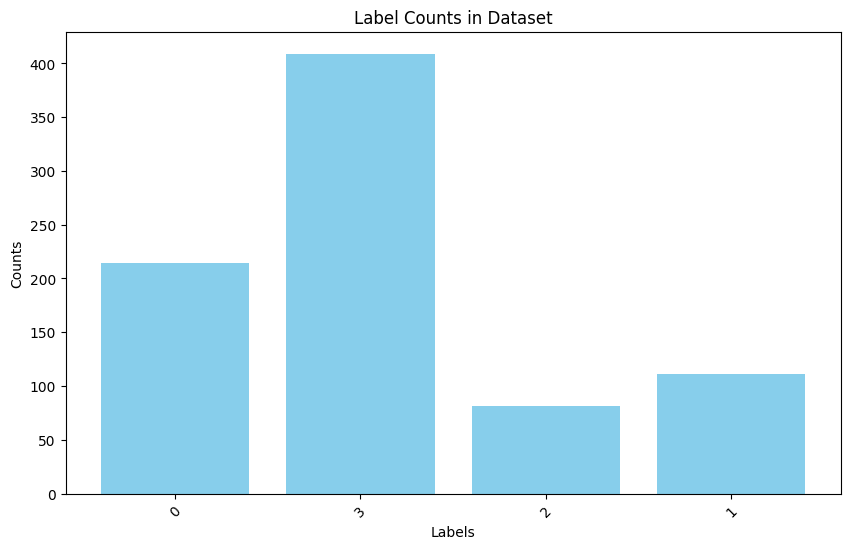

In [8]:
import os
from collections import Counter

def scan_and_extract_labels_from_txt(directory):
    label_counts = Counter()
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith('.txt'):
                file_path = os.path.join(root, file)
                try:
                    with open(file_path, 'r') as f:
                        for line in f:
                            label = line.strip().split()[0]
                            label_counts[label] += 1
                except Exception as e:
                    print(f"Error processing file {file_path}: {e}")

    # Print the count of each label
    for label, count in label_counts.items():
        print(f"Label {label}: {count}")

    return label_counts

# Replace 'your_directory_path_here' with the path to your directory
directory_path = 'Post_Event_Grids_In_JPEG/YOLODataset/labels'
label_counts = scan_and_extract_labels_from_txt(directory_path)

# Plotting the bar chart
labels, counts = zip(*label_counts.items())
plt.figure(figsize=(10, 6))
plt.bar(labels, counts, color='skyblue')
plt.xlabel('Labels')
plt.ylabel('Counts')
plt.title('Label Counts in Dataset')
plt.xticks(rotation=45)
plt.show()


# Image Augmentation Pipeline

This script defines an image augmentation pipeline using the `albumentations` library. The pipeline includes various augmentations such as horizontal flip, vertical flip, random rotation, brightness/contrast adjustment, Gaussian noise, and blur. The following steps are performed:

1. Import necessary augmentation functions from `albumentations`.
2. Define a function to create and return a composition of augmentations.

In [4]:
%pip install albumentations


  Using cached albumentations-1.4.7-py3-none-any.whl.metadata (37 kB)
  Using cached pydantic-2.7.1-py3-none-any.whl.metadata (107 kB)
  Using cached annotated_types-0.6.0-py3-none-any.whl.metadata (12 kB)
  Using cached imageio-2.34.1-py3-none-any.whl.metadata (4.9 kB)
  Using cached lazy_loader-0.4-py3-none-any.whl.metadata (7.6 kB)
Using cached albumentations-1.4.7-py3-none-any.whl (155 kB)
Using cached pydantic-2.7.1-py3-none-any.whl (409 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 12.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 4.0 MB/s eta 0:00:0000:0100:01
Using cached annotated_types-0.6.0-py3-none-any.whl (12 kB)
Using cached imageio-2.34.1-py3-none-any.whl (313 kB)
Using cached lazy_loader-0.4-py3-none-any.whl (12 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.7/225.7 kB 5.4 MB/s eta 0:00:00:00:01
Note: you may need to restart the kernel to use updated packages.


In [6]:
from albumentations import Compose, HorizontalFlip, VerticalFlip, RandomRotate90, RandomBrightnessContrast, GaussNoise, Blur

def get_augmentation_pipeline():
    """Defines and returns an augmentation pipeline with multiple augmentations."""
    return Compose([
        HorizontalFlip(p=0.5),
        VerticalFlip(p=0.5),
        RandomRotate90(p=0.5),
        RandomBrightnessContrast(p=0.5),
        GaussNoise(p=0.2),
        Blur(blur_limit=3, p=0.2),
        # Add more augmentations here as needed.
    ])


# Image Loading, Saving, and Augmentation Functions

This script provides functions to load an image, save an image, and apply an augmentation pipeline to an image using `opencv` and `albumentations` libraries. The following steps are performed:

1. Load an image from a given path.
2. Save an image to a given path.
3. Apply an augmentation pipeline to an image.

In [7]:
def load_image(image_path):
    """Loads an image from a given path."""
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

def save_image(image, path):
    """Saves an image to a given path."""
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    cv2.imwrite(path, image)


def augment_image(image, augmentation_pipeline):
    """Applies the augmentation pipeline to an image."""
    augmented = augmentation_pipeline(image=image)
    return augmented['image']


# Image Augmentation Pipeline

This script defines an image augmentation pipeline using the `albumentations` library. The pipeline includes various augmentations such as horizontal flip, vertical flip, random rotation, brightness/contrast adjustment, Gaussian noise, and blur. The following steps are performed:

1. Import necessary augmentation functions from `albumentations`.
2. Define a function to create and return a composition of augmentations.


In [8]:
import os
from PIL import Image
import cv2

# Assuming the load_image and save_image functions are already defined as per previous examples.

def process_directory(input_dir, output_dir):
    """Processes all images in the input directory with augmentations and saves them to the output directory."""
    # Make sure the output directory exists
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    augmentation_pipeline = get_augmentation_pipeline()

    # Iterate through all files in the input directory
    for filename in os.listdir(input_dir):
        if filename.lower().endswith((".jpg", ".jpeg", ".png", ".tif", ".tiff")):
            input_path = os.path.join(input_dir, filename)
            output_path = os.path.join(output_dir, f"aug_{filename}")
            
            try:
                # Load the image
                image = load_image(input_path)
                # Apply augmentations
                augmented_image = augment_image(image, augmentation_pipeline)
                # Save the augmented image
                save_image(augmented_image, output_path)
                print(f"Processed and saved {filename} as {output_path}")
            except Exception as e:
                print(f"Failed to process {filename}: {e}")

# Example usage
if __name__ == "__main__":
    input_directory = 'Intersecting_Batches-4/jpeg'
    output_directory = 'Intersecting_Batches-4/jpeg'
    process_directory(input_directory, output_directory)


# Model

In [9]:
images_path = 'datasets/images'
labels_path = 'datasets/labels'

# YOLOv8 Model Initialization

This line initializes a YOLOv8 model by loading the pre-trained weights from the "yolov8s.pt" file, allowing for object detection and image segmentation tasks.


In [12]:
model = YOLO("yolov8s.pt")

# Model Training

This line trains the YOLOv8 model using the dataset specified in the `dataset.yaml` file. The training process runs for 12 epochs with an image size of 512x512 pixels.


In [20]:
results = model.train(data='./dataset.yaml', epochs=12, imgsz=512)

New https://pypi.org/project/ultralytics/8.1.26 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.24 🚀 Python-3.8.5 torch-2.2.1 CPU (Intel Core(TM) i5-1030NG7 1.10GHz)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=./dataset.yaml, epochs=12, time=None, patience=100, batch=16, imgsz=512, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train23, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=F

train: Scanning /Users/elenalickel/Desktop/EY_Challengev2/Intersecting_Batches-4/YOLODataset/labels/train... 78 images, 11 backgrounds, 0 corrupt: 100%|██████████| 89/89 [00:00<00:00, 149.81it/s]


train: New cache created: /Users/elenalickel/Desktop/EY_Challengev2/Intersecting_Batches-4/YOLODataset/labels/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /Users/elenalickel/Desktop/EY_Challengev2/Intersecting_Batches-4/YOLODataset/labels/train.cache... 78 images, 11 backgrounds, 0 corrupt: 100%|██████████| 89/89 [00:00<?, ?it/s]


Plotting labels to /Users/elenalickel/Desktop/EY_challengev2/runs/detect/train23/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 512 train, 512 val
Using 0 dataloader workers
Logging results to /Users/elenalickel/Desktop/EY_challengev2/runs/detect/train23
Starting training for 12 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/12         0G       1.91      4.258      1.592        103        512: 100%|██████████| 6/6 [05:01<00:00, 50.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [01:24<00:00, 28.27s/it]

                   all         89       1156     0.0527      0.486     0.0653     0.0334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/12         0G      1.678      3.108      1.392        158        512: 100%|██████████| 6/6 [03:42<00:00, 37.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [01:02<00:00, 20.94s/it]

                   all         89       1156      0.189      0.429      0.161     0.0857


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/12         0G      1.537      2.335      1.347        120        512: 100%|██████████| 6/6 [03:01<00:00, 30.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [01:04<00:00, 21.34s/it]

                   all         89       1156      0.189      0.439      0.173     0.0926



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/12         0G      1.466      2.151      1.261         94        512: 100%|██████████| 6/6 [02:59<00:00, 29.91s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:56<00:00, 18.95s/it]

                   all         89       1156      0.286      0.476       0.26      0.138



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/12         0G      1.395      2.043      1.223         80        512: 100%|██████████| 6/6 [03:01<00:00, 30.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:50<00:00, 16.95s/it]

                   all         89       1156      0.311      0.421      0.297      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/12         0G      1.372      1.939       1.26        105        512: 100%|██████████| 6/6 [03:28<00:00, 34.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [01:24<00:00, 28.07s/it]

                   all         89       1156      0.288      0.548      0.331      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/12         0G      1.384       1.83      1.284        136        512: 100%|██████████| 6/6 [04:48<00:00, 48.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:58<00:00, 19.56s/it]

                   all         89       1156      0.363      0.445      0.349       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/12         0G       1.33      1.727      1.212        171        512: 100%|██████████| 6/6 [03:24<00:00, 34.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:51<00:00, 17.06s/it]

                   all         89       1156       0.38      0.481      0.392      0.246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/12         0G      1.263      1.666      1.232         64        512: 100%|██████████| 6/6 [03:00<00:00, 30.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:51<00:00, 17.30s/it]

                   all         89       1156      0.421      0.515      0.444      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/12         0G      1.333      1.704      1.214        114        512: 100%|██████████| 6/6 [03:12<00:00, 32.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:51<00:00, 17.09s/it]

                   all         89       1156      0.467      0.531      0.492      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/12         0G      1.286      1.703      1.199        117        512: 100%|██████████| 6/6 [03:24<00:00, 34.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [01:23<00:00, 27.90s/it]

                   all         89       1156      0.501      0.514       0.52      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/12         0G      1.236      1.562      1.154         96        512: 100%|██████████| 6/6 [04:32<00:00, 45.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [01:36<00:00, 32.19s/it]


                   all         89       1156      0.522       0.55      0.555      0.366

12 epochs completed in 0.961 hours.
Optimizer stripped from /Users/elenalickel/Desktop/EY_challengev2/runs/detect/train23/weights/last.pt, 22.5MB
Optimizer stripped from /Users/elenalickel/Desktop/EY_challengev2/runs/detect/train23/weights/best.pt, 22.5MB

Validating /Users/elenalickel/Desktop/EY_challengev2/runs/detect/train23/weights/best.pt...
Ultralytics YOLOv8.1.24 🚀 Python-3.8.5 torch-2.2.1 CPU (Intel Core(TM) i5-1030NG7 1.10GHz)
Model summary (fused): 168 layers, 11127132 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [01:09<00:00, 23.15s/it]


                   all         89       1156      0.525      0.548      0.555      0.366
                     0         89        260      0.536      0.496      0.504      0.299
                     3         89        198      0.505      0.504      0.507      0.338
                     2         89        174       0.43      0.498      0.516      0.394
                     1         89        524      0.628      0.693      0.694      0.433
Speed: 5.6ms preprocess, 716.1ms inference, 0.0ms loss, 16.6ms postprocess per image
Results saved to /Users/elenalickel/Desktop/EY_challengev2/runs/detect/train23


# Install Packages for Hyperparameter Tuning

This script imports necessary functions for hyperparameter tuning from the `hyperopt` library. The imported functions include:

- `fmin`: Function to minimize the objective function.
- `tpe`: Tree-structured Parzen Estimator, a sequential model-based optimization algorithm.
- `hp`: Hyperparameter search space.
- `STATUS_OK`: Status flag for successful trials.
- `Trials`: Object to keep track of the optimization process and results.


In [16]:
%pip install hyperopt

  Using cached hyperopt-0.2.7-py2.py3-none-any.whl.metadata (1.7 kB)
  Using cached future-1.0.0-py3-none-any.whl.metadata (4.0 kB)
  Using cached cloudpickle-3.0.0-py3-none-any.whl.metadata (7.0 kB)
  Using cached py4j-0.10.9.7-py2.py3-none-any.whl.metadata (1.5 kB)
Using cached hyperopt-0.2.7-py2.py3-none-any.whl (1.6 MB)
Using cached cloudpickle-3.0.0-py3-none-any.whl (20 kB)
Using cached future-1.0.0-py3-none-any.whl (491 kB)
Using cached py4j-0.10.9.7-py2.py3-none-any.whl (200 kB)
Note: you may need to restart the kernel to use updated packages.


In [17]:
# install packages for hyperparameter tuning 
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

In [18]:
!python /Users/elenalickel/Desktop/EY_Challengev2/venv/lib/python3.8/site-packages/ultralytics/models/yolo/classify/train.py --img 512 --batch 16 --epochs 30 --data dataset.yaml --weights /runs/detect/train23/weights/last.pt

python: can't open file '/Users/elenalickel/Desktop/EY_Challengev2/venv/lib/python3.8/site-packages/ultralytics/models/yolo/classify/train.py': [Errno 2] No such file or directory


# Hyperparameter Tuning with Ray Tune

This script performs hyperparameter tuning using the `ray[tune]` library. The process involves defining a search space for hyperparameters and running multiple trials to find the optimal configuration. The following steps are performed:

1. Import necessary modules from `ray.tune`.
2. Define a function `train_model_with_ray_tune` to train the model with parameters provided by Ray Tune.
3. Define the search space for hyperparameters.
4. Start the hyperparameter tuning process with `tune.run`.
5. Extract and print the best hyperparameters.

In [20]:
%pip install ray

  Using cached aiosignal-1.3.1-py3-none-any.whl.metadata (4.0 kB)
  Using cached jsonschema_specifications-2023.12.1-py3-none-any.whl.metadata (3.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 MB 21.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.0/88.0 kB 2.5 MB/s eta 0:00:00
Using cached aiosignal-1.3.1-py3-none-any.whl (7.6 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 3.3 MB/s eta 0:00:00
Using cached jsonschema_specifications-2023.12.1-py3-none-any.whl (18 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 327.7/327.7 kB 8.2 MB/s eta 0:00:00:00:01
Note: you may need to restart the kernel to use updated packages.


In [22]:
%pip install "ray[tune]"

  Using cached tensorboardX-2.6.2.2-py2.py3-none-any.whl.metadata (5.8 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.3/28.3 MB 20.4 MB/s eta 0:00:0000:0100:01
Using cached tensorboardX-2.6.2.2-py2.py3-none-any.whl (101 kB)
Note: you may need to restart the kernel to use updated packages.


In [23]:
from ray import tune
import numpy as np


def train_model_with_ray_tune(config):
    # Extract parameters from the config provided by Ray Tune
    lr = config["lr"]
    batch_size = config["batch_size"]
    
    # Call your existing training function with parameters from Ray Tune
    train_results = train_model_with_dynamic_config(
        ckpt_path=latest_ckpt_path,  # Make sure latest_ckpt_path is defined
        epochs=30,  # Consider making this a tunable parameter as well
        lr=lr,
        batch_size=batch_size,
    )
    
    # Report the validation metric back to Ray Tune
    # Ensure your training function returns a dictionary with "validation_metric"
    tune.report(validation_metric=train_results['validation_metric'])

# Define the search space for hyperparameters
search_space = {
    "lr": tune.loguniform(1e-5, 1e-1),
    "batch_size": tune.choice([8, 16, 32, 64])
}

# Start the hyperparameter tuning process
analysis = tune.run(
    train_model_with_ray_tune,
    resources_per_trial={"cpu": 1, "gpu": 1},  # Adjust resources per your availability
    config=search_space,
    num_samples=100,  # Number of trials to run
    metric="validation_metric",  # Name of the metric to optimize
    mode="max",  # "max" if higher metric is better, "min" otherwise
)

# Extract the best hyperparameters
best_config = analysis.best_config
best_lr = best_config["lr"]
best_batch_size = best_config["batch_size"]

print(f"Best hyperparameters found were: lr = {best_lr}, batch_size = {best_batch_size}")



2024-05-16 15:27:44,207	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-05-16 15:27:50,293	INFO worker.py:1749 -- Started a local Ray instance.
2024-05-16 15:27:52,085	INFO tune.py:253 -- Initializing Ray automatically. For cluster usage or custom Ray initialization, call `ray.init(...)` before `tune.run(...)`.
2024-05-16 15:27:52,090	INFO tune.py:614 -- [output] This uses the legacy output and progress reporter, as Jupyter notebooks are not supported by the new engine, yet. For more information, please see https://github.com/ray-project/ray/issues/36949


(autoscaler +2m13s) Tip: use `ray status` to view detailed cluster status. To disable these messages, set RAY_SCHEDULER_EVENTS=0.
(autoscaler +2m13s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


(raylet) [2024-05-16 15:28:00,264 E 15849 1040368] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-05-16_15-27-44_532287_13848 is over 95% full, available space: 23867740160; capacity: 499963174912. Object creation will fail if spilling is required.
(raylet) [2024-05-16 15:28:10,338 E 15849 1040368] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-05-16_15-27-44_532287_13848 is over 95% full, available space: 23867699200; capacity: 499963174912. Object creation will fail if spilling is required.
(raylet) [2024-05-16 15:28:20,413 E 15849 1040368] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-05-16_15-27-44_532287_13848 is over 95% full, available space: 23866966016; capacity: 499963174912. Object creation will fail if spilling is required.
(raylet) [2024-05-16 15:28:30,497 E 15849 1040368] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-05-16_15-27-44_532287_13848 is over 95% full, available space: 23866966016; capacity: 499963174912. Object 

(autoscaler +2m48s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


(raylet) [2024-05-16 15:28:40,581 E 15849 1040368] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-05-16_15-27-44_532287_13848 is over 95% full, available space: 23866966016; capacity: 499963174912. Object creation will fail if spilling is required.
(raylet) [2024-05-16 15:28:50,664 E 15849 1040368] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-05-16_15-27-44_532287_13848 is over 95% full, available space: 23866986496; capacity: 499963174912. Object creation will fail if spilling is required.
2024-05-16 15:28:53,278	WARNING insufficient_resources_manager.py:163 -- Ignore this message if the cluster is autoscaling. No trial is running and no new trial has been started within the last 60 seconds. This could be due to the cluster not having enough resources available. You asked for 1.0 CPUs and 1.0 GPUs per trial, but the cluster only has 8.0 CPUs and 0 GPUs available. Stop the tuning and adjust the required resources (e.g. via the `ScalingConfig` or `resources_per

(autoscaler +3m23s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


(raylet) [2024-05-16 15:29:10,812 E 15849 1040368] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-05-16_15-27-44_532287_13848 is over 95% full, available space: 23866732544; capacity: 499963174912. Object creation will fail if spilling is required.
(raylet) [2024-05-16 15:29:20,891 E 15849 1040368] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-05-16_15-27-44_532287_13848 is over 95% full, available space: 23865217024; capacity: 499963174912. Object creation will fail if spilling is required.
(raylet) [2024-05-16 15:29:30,966 E 15849 1040368] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-05-16_15-27-44_532287_13848 is over 95% full, available space: 23863840768; capacity: 499963174912. Object creation will fail if spilling is required.
(raylet) [2024-05-16 15:29:41,045 E 15849 1040368] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-05-16_15-27-44_532287_13848 is over 95% full, available space: 23863177216; capacity: 499963174912. Object 

(autoscaler +3m58s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


(raylet) [2024-05-16 15:29:51,121 E 15849 1040368] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-05-16_15-27-44_532287_13848 is over 95% full, available space: 23863017472; capacity: 499963174912. Object creation will fail if spilling is required.
2024-05-16 15:29:53,375	WARNING insufficient_resources_manager.py:163 -- Ignore this message if the cluster is autoscaling. No trial is running and no new trial has been started within the last 60 seconds. This could be due to the cluster not having enough resources available. You asked for 1.0 CPUs and 1.0 GPUs per trial, but the cluster only has 8.0 CPUs and 0 GPUs available. Stop the tuning and adjust the required resources (e.g. via the `ScalingConfig` or `resources_per_trial`, or `num_workers` for rllib), or add more resources to your cluster.
(raylet) [2024-05-16 15:30:01,202 E 15849 1040368] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-05-16_15-27-44_532287_13848 is over 95% full, available space: 23861469184

(autoscaler +4m34s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


(raylet) [2024-05-16 15:30:21,354 E 15849 1040368] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-05-16_15-27-44_532287_13848 is over 95% full, available space: 23861248000; capacity: 499963174912. Object creation will fail if spilling is required.
(raylet) [2024-05-16 15:30:31,437 E 15849 1040368] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-05-16_15-27-44_532287_13848 is over 95% full, available space: 23861796864; capacity: 499963174912. Object creation will fail if spilling is required.
(raylet) [2024-05-16 15:30:41,513 E 15849 1040368] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-05-16_15-27-44_532287_13848 is over 95% full, available space: 23865917440; capacity: 499963174912. Object creation will fail if spilling is required.
(raylet) [2024-05-16 15:30:51,589 E 15849 1040368] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-05-16_15-27-44_532287_13848 is over 95% full, available space: 23865741312; capacity: 499963174912. Object 

(autoscaler +5m9s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


(raylet) [2024-05-16 15:31:01,660 E 15849 1040368] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-05-16_15-27-44_532287_13848 is over 95% full, available space: 23864336384; capacity: 499963174912. Object creation will fail if spilling is required.
(raylet) [2024-05-16 15:31:11,740 E 15849 1040368] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-05-16_15-27-44_532287_13848 is over 95% full, available space: 23863132160; capacity: 499963174912. Object creation will fail if spilling is required.
(raylet) [2024-05-16 15:31:21,822 E 15849 1040368] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-05-16_15-27-44_532287_13848 is over 95% full, available space: 23862652928; capacity: 499963174912. Object creation will fail if spilling is required.


(autoscaler +5m44s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


(raylet) [2024-05-16 15:31:31,904 E 15849 1040368] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-05-16_15-27-44_532287_13848 is over 95% full, available space: 23850553344; capacity: 499963174912. Object creation will fail if spilling is required.
(raylet) [2024-05-16 15:31:41,989 E 15849 1040368] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-05-16_15-27-44_532287_13848 is over 95% full, available space: 23849328640; capacity: 499963174912. Object creation will fail if spilling is required.
(raylet) [2024-05-16 15:31:52,069 E 15849 1040368] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-05-16_15-27-44_532287_13848 is over 95% full, available space: 23848091648; capacity: 499963174912. Object creation will fail if spilling is required.
2024-05-16 15:31:53,493	WARNING insufficient_resources_manager.py:163 -- Ignore this message if the cluster is autoscaling. No trial is running and no new trial has been started within the last 60 seconds. This could 

(autoscaler +6m19s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


(raylet) [2024-05-16 15:32:12,231 E 15849 1040368] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-05-16_15-27-44_532287_13848 is over 95% full, available space: 23847968768; capacity: 499963174912. Object creation will fail if spilling is required.
(raylet) [2024-05-16 15:32:22,317 E 15849 1040368] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-05-16_15-27-44_532287_13848 is over 95% full, available space: 23846752256; capacity: 499963174912. Object creation will fail if spilling is required.
(raylet) [2024-05-16 15:32:32,401 E 15849 1040368] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-05-16_15-27-44_532287_13848 is over 95% full, available space: 23833198592; capacity: 499963174912. Object creation will fail if spilling is required.


(autoscaler +6m54s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


(raylet) [2024-05-16 15:32:42,464 E 15849 1040368] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-05-16_15-27-44_532287_13848 is over 95% full, available space: 23831093248; capacity: 499963174912. Object creation will fail if spilling is required.
(raylet) [2024-05-16 15:32:52,532 E 15849 1040368] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-05-16_15-27-44_532287_13848 is over 95% full, available space: 23826391040; capacity: 499963174912. Object creation will fail if spilling is required.
2024-05-16 15:32:53,499	WARNING insufficient_resources_manager.py:163 -- Ignore this message if the cluster is autoscaling. No trial is running and no new trial has been started within the last 60 seconds. This could be due to the cluster not having enough resources available. You asked for 1.0 CPUs and 1.0 GPUs per trial, but the cluster only has 8.0 CPUs and 0 GPUs available. Stop the tuning and adjust the required resources (e.g. via the `ScalingConfig` or `resources_per

(autoscaler +7m30s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


(raylet) [2024-05-16 15:33:22,739 E 15849 1040368] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-05-16_15-27-44_532287_13848 is over 95% full, available space: 23829000192; capacity: 499963174912. Object creation will fail if spilling is required.
(raylet) [2024-05-16 15:33:32,816 E 15849 1040368] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-05-16_15-27-44_532287_13848 is over 95% full, available space: 23828418560; capacity: 499963174912. Object creation will fail if spilling is required.
(raylet) [2024-05-16 15:33:42,903 E 15849 1040368] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-05-16_15-27-44_532287_13848 is over 95% full, available space: 23826448384; capacity: 499963174912. Object creation will fail if spilling is required.


(autoscaler +8m5s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


(raylet) [2024-05-16 15:33:52,992 E 15849 1040368] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-05-16_15-27-44_532287_13848 is over 95% full, available space: 23826071552; capacity: 499963174912. Object creation will fail if spilling is required.
2024-05-16 15:33:53,551	WARNING insufficient_resources_manager.py:163 -- Ignore this message if the cluster is autoscaling. No trial is running and no new trial has been started within the last 60 seconds. This could be due to the cluster not having enough resources available. You asked for 1.0 CPUs and 1.0 GPUs per trial, but the cluster only has 8.0 CPUs and 0 GPUs available. Stop the tuning and adjust the required resources (e.g. via the `ScalingConfig` or `resources_per_trial`, or `num_workers` for rllib), or add more resources to your cluster.
(raylet) [2024-05-16 15:34:03,070 E 15849 1040368] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-05-16_15-27-44_532287_13848 is over 95% full, available space: 23825711104

(autoscaler +8m40s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


(raylet) [2024-05-16 15:34:33,302 E 15849 1040368] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-05-16_15-27-44_532287_13848 is over 95% full, available space: 23823863808; capacity: 499963174912. Object creation will fail if spilling is required.
(raylet) [2024-05-16 15:34:43,385 E 15849 1040368] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-05-16_15-27-44_532287_13848 is over 95% full, available space: 23823855616; capacity: 499963174912. Object creation will fail if spilling is required.
(raylet) [2024-05-16 15:34:53,471 E 15849 1040368] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-05-16_15-27-44_532287_13848 is over 95% full, available space: 23821946880; capacity: 499963174912. Object creation will fail if spilling is required.
2024-05-16 15:34:53,645	WARNING insufficient_resources_manager.py:163 -- Ignore this message if the cluster is autoscaling. No trial is running and no new trial has been started within the last 60 seconds. This could 

(autoscaler +9m15s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


(raylet) [2024-05-16 15:35:03,562 E 15849 1040368] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-05-16_15-27-44_532287_13848 is over 95% full, available space: 23821643776; capacity: 499963174912. Object creation will fail if spilling is required.
(raylet) [2024-05-16 15:35:13,660 E 15849 1040368] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-05-16_15-27-44_532287_13848 is over 95% full, available space: 23821643776; capacity: 499963174912. Object creation will fail if spilling is required.
(raylet) [2024-05-16 15:35:23,747 E 15849 1040368] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-05-16_15-27-44_532287_13848 is over 95% full, available space: 23821574144; capacity: 499963174912. Object creation will fail if spilling is required.
(raylet) [2024-05-16 15:35:33,837 E 15849 1040368] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-05-16_15-27-44_532287_13848 is over 95% full, available space: 23820394496; capacity: 499963174912. Object 

(autoscaler +9m50s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


(raylet) [2024-05-16 15:35:43,924 E 15849 1040368] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-05-16_15-27-44_532287_13848 is over 95% full, available space: 23819018240; capacity: 499963174912. Object creation will fail if spilling is required.
2024-05-16 15:35:53,664	WARNING insufficient_resources_manager.py:163 -- Ignore this message if the cluster is autoscaling. No trial is running and no new trial has been started within the last 60 seconds. This could be due to the cluster not having enough resources available. You asked for 1.0 CPUs and 1.0 GPUs per trial, but the cluster only has 8.0 CPUs and 0 GPUs available. Stop the tuning and adjust the required resources (e.g. via the `ScalingConfig` or `resources_per_trial`, or `num_workers` for rllib), or add more resources to your cluster.
(raylet) [2024-05-16 15:35:53,998 E 15849 1040368] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-05-16_15-27-44_532287_13848 is over 95% full, available space: 23817904128

(autoscaler +10m25s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


(raylet) [2024-05-16 15:36:14,183 E 15849 1040368] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-05-16_15-27-44_532287_13848 is over 95% full, available space: 23817793536; capacity: 499963174912. Object creation will fail if spilling is required.
(raylet) [2024-05-16 15:36:24,269 E 15849 1040368] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-05-16_15-27-44_532287_13848 is over 95% full, available space: 23817728000; capacity: 499963174912. Object creation will fail if spilling is required.
(raylet) [2024-05-16 15:36:34,358 E 15849 1040368] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-05-16_15-27-44_532287_13848 is over 95% full, available space: 23817719808; capacity: 499963174912. Object creation will fail if spilling is required.
(raylet) [2024-05-16 15:36:44,457 E 15849 1040368] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-05-16_15-27-44_532287_13848 is over 95% full, available space: 23817719808; capacity: 499963174912. Object 

(autoscaler +11m1s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2024-05-16 15:36:53,665	WARNING insufficient_resources_manager.py:163 -- Ignore this message if the cluster is autoscaling. No trial is running and no new trial has been started within the last 60 seconds. This could be due to the cluster not having enough resources available. You asked for 1.0 CPUs and 1.0 GPUs per trial, but the cluster only has 8.0 CPUs and 0 GPUs available. Stop the tuning and adjust the required resources (e.g. via the `ScalingConfig` or `resources_per_trial`, or `num_workers` for rllib), or add more resources to your cluster.
(raylet) [2024-05-16 15:36:54,551 E 15849 1040368] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-05-16_15-27-44_532287_13848 is over 95% full, available space: 23816466432; capacity: 499963174912. Object creation will fail if spilling is required.
(raylet) [2024-05-16 15:37:04,645 E 15849 1040368] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-05-16_15-27-44_532287_13848 is over 95% full, available space: 23816269824

(autoscaler +11m36s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


(raylet) [2024-05-16 15:37:24,816 E 15849 1040368] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-05-16_15-27-44_532287_13848 is over 95% full, available space: 23816269824; capacity: 499963174912. Object creation will fail if spilling is required.
(raylet) [2024-05-16 15:37:34,910 E 15849 1040368] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-05-16_15-27-44_532287_13848 is over 95% full, available space: 23816089600; capacity: 499963174912. Object creation will fail if spilling is required.
(raylet) [2024-05-16 15:37:45,005 E 15849 1040368] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-05-16_15-27-44_532287_13848 is over 95% full, available space: 23816089600; capacity: 499963174912. Object creation will fail if spilling is required.
2024-05-16 15:37:53,743	WARNING insufficient_resources_manager.py:163 -- Ignore this message if the cluster is autoscaling. No trial is running and no new trial has been started within the last 60 seconds. This could 

(autoscaler +12m11s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


(raylet) [2024-05-16 15:38:05,173 E 15849 1040368] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-05-16_15-27-44_532287_13848 is over 95% full, available space: 23820185600; capacity: 499963174912. Object creation will fail if spilling is required.
(raylet) [2024-05-16 15:38:15,267 E 15849 1040368] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-05-16_15-27-44_532287_13848 is over 95% full, available space: 23819038720; capacity: 499963174912. Object creation will fail if spilling is required.
(raylet) [2024-05-16 15:38:25,356 E 15849 1040368] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-05-16_15-27-44_532287_13848 is over 95% full, available space: 23819038720; capacity: 499963174912. Object creation will fail if spilling is required.


(autoscaler +12m46s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


(raylet) [2024-05-16 15:38:35,444 E 15849 1040368] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-05-16_15-27-44_532287_13848 is over 95% full, available space: 23819829248; capacity: 499963174912. Object creation will fail if spilling is required.
(raylet) [2024-05-16 15:38:45,536 E 15849 1040368] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-05-16_15-27-44_532287_13848 is over 95% full, available space: 23818776576; capacity: 499963174912. Object creation will fail if spilling is required.
2024-05-16 15:38:53,759	WARNING insufficient_resources_manager.py:163 -- Ignore this message if the cluster is autoscaling. No trial is running and no new trial has been started within the last 60 seconds. This could be due to the cluster not having enough resources available. You asked for 1.0 CPUs and 1.0 GPUs per trial, but the cluster only has 8.0 CPUs and 0 GPUs available. Stop the tuning and adjust the required resources (e.g. via the `ScalingConfig` or `resources_per

(autoscaler +13m22s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


(raylet) [2024-05-16 15:39:15,805 E 15849 1040368] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-05-16_15-27-44_532287_13848 is over 95% full, available space: 23817060352; capacity: 499963174912. Object creation will fail if spilling is required.
(raylet) [2024-05-16 15:39:25,896 E 15849 1040368] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-05-16_15-27-44_532287_13848 is over 95% full, available space: 23817060352; capacity: 499963174912. Object creation will fail if spilling is required.
(raylet) [2024-05-16 15:39:35,987 E 15849 1040368] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-05-16_15-27-44_532287_13848 is over 95% full, available space: 23817080832; capacity: 499963174912. Object creation will fail if spilling is required.


(autoscaler +13m57s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


(raylet) [2024-05-16 15:39:46,073 E 15849 1040368] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-05-16_15-27-44_532287_13848 is over 95% full, available space: 23817076736; capacity: 499963174912. Object creation will fail if spilling is required.
2024-05-16 15:39:53,774	WARNING insufficient_resources_manager.py:163 -- Ignore this message if the cluster is autoscaling. No trial is running and no new trial has been started within the last 60 seconds. This could be due to the cluster not having enough resources available. You asked for 1.0 CPUs and 1.0 GPUs per trial, but the cluster only has 8.0 CPUs and 0 GPUs available. Stop the tuning and adjust the required resources (e.g. via the `ScalingConfig` or `resources_per_trial`, or `num_workers` for rllib), or add more resources to your cluster.
(raylet) [2024-05-16 15:39:56,162 E 15849 1040368] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-05-16_15-27-44_532287_13848 is over 95% full, available space: 23817076736

(autoscaler +14m32s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


(raylet) [2024-05-16 15:40:26,416 E 15849 1040368] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-05-16_15-27-44_532287_13848 is over 95% full, available space: 23824171008; capacity: 499963174912. Object creation will fail if spilling is required.
(raylet) [2024-05-16 15:40:36,502 E 15849 1040368] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-05-16_15-27-44_532287_13848 is over 95% full, available space: 23824171008; capacity: 499963174912. Object creation will fail if spilling is required.
(raylet) [2024-05-16 15:40:46,593 E 15849 1040368] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-05-16_15-27-44_532287_13848 is over 95% full, available space: 23822938112; capacity: 499963174912. Object creation will fail if spilling is required.


(autoscaler +15m7s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


2024-05-16 15:40:53,803	WARNING insufficient_resources_manager.py:163 -- Ignore this message if the cluster is autoscaling. No trial is running and no new trial has been started within the last 60 seconds. This could be due to the cluster not having enough resources available. You asked for 1.0 CPUs and 1.0 GPUs per trial, but the cluster only has 8.0 CPUs and 0 GPUs available. Stop the tuning and adjust the required resources (e.g. via the `ScalingConfig` or `resources_per_trial`, or `num_workers` for rllib), or add more resources to your cluster.
(raylet) [2024-05-16 15:40:56,691 E 15849 1040368] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-05-16_15-27-44_532287_13848 is over 95% full, available space: 23822839808; capacity: 499963174912. Object creation will fail if spilling is required.
(raylet) [2024-05-16 15:41:06,787 E 15849 1040368] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-05-16_15-27-44_532287_13848 is over 95% full, available space: 23822839808

(autoscaler +15m42s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


(raylet) [2024-05-16 15:41:26,976 E 15849 1040368] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-05-16_15-27-44_532287_13848 is over 95% full, available space: 23822598144; capacity: 499963174912. Object creation will fail if spilling is required.
(raylet) [2024-05-16 15:41:37,070 E 15849 1040368] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-05-16_15-27-44_532287_13848 is over 95% full, available space: 23822462976; capacity: 499963174912. Object creation will fail if spilling is required.
(raylet) [2024-05-16 15:41:47,163 E 15849 1040368] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-05-16_15-27-44_532287_13848 is over 95% full, available space: 23822364672; capacity: 499963174912. Object creation will fail if spilling is required.
2024-05-16 15:41:53,849	WARNING insufficient_resources_manager.py:163 -- Ignore this message if the cluster is autoscaling. No trial is running and no new trial has been started within the last 60 seconds. This could 

(autoscaler +16m17s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


(raylet) [2024-05-16 15:42:07,345 E 15849 1040368] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-05-16_15-27-44_532287_13848 is over 95% full, available space: 23822274560; capacity: 499963174912. Object creation will fail if spilling is required.
(raylet) [2024-05-16 15:42:17,435 E 15849 1040368] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-05-16_15-27-44_532287_13848 is over 95% full, available space: 23822143488; capacity: 499963174912. Object creation will fail if spilling is required.
(raylet) [2024-05-16 15:42:27,519 E 15849 1040368] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-05-16_15-27-44_532287_13848 is over 95% full, available space: 23822139392; capacity: 499963174912. Object creation will fail if spilling is required.


(autoscaler +16m53s) Error: No available node types can fulfill resource request {'CPU': 1.0, 'GPU': 1.0}. Add suitable node types to this cluster to resolve this issue.


(raylet) [2024-05-16 15:42:37,596 E 15849 1040368] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-05-16_15-27-44_532287_13848 is over 95% full, available space: 23820824576; capacity: 499963174912. Object creation will fail if spilling is required.
(raylet) [2024-05-16 15:42:47,659 E 15849 1040368] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-05-16_15-27-44_532287_13848 is over 95% full, available space: 23819898880; capacity: 499963174912. Object creation will fail if spilling is required.
2024-05-16 15:42:53,890	WARNING insufficient_resources_manager.py:163 -- Ignore this message if the cluster is autoscaling. No trial is running and no new trial has been started within the last 60 seconds. This could be due to the cluster not having enough resources available. You asked for 1.0 CPUs and 1.0 GPUs per trial, but the cluster only has 8.0 CPUs and 0 GPUs available. Stop the tuning and adjust the required resources (e.g. via the `ScalingConfig` or `resources_per

In [16]:
# Install the ray module
!pip install ray

import numpy as np
from ray import tune
from ray.tune.schedulers import ASHAScheduler

def train_model_with_dynamic_config(ckpt_path, epochs, lr, batch_size):
    # Placeholder for actual training logic
    # Example return dictionary with a validation metric
    return {"validation_metric": np.random.random()}

def train_model_with_ray_tune(config):
    # Extract parameters from the config provided by Ray Tune
    lr = config["lr"]
    batch_size = config["batch_size"]
    
    # Assuming latest_ckpt_path is a global variable or defined elsewhere in your script
    global latest_ckpt_path
    latest_ckpt_path = "path/to/latest/checkpoint"
    
    # Call your existing training function with parameters from Ray Tune
    train_results = train_model_with_dynamic_config(
        ckpt_path=latest_ckpt_path,
        epochs=30,  # Consider making this a tunable parameter as well
        lr=lr,
        batch_size=batch_size,
    )
    
    # Report the validation metric back to Ray Tune
    tune.report(validation_metric=train_results['validation_metric'])

# Define the search space for hyperparameters
search_space = {
    "lr": tune.loguniform(1e-5, 1e-1),
    "batch_size": tune.choice([8, 16, 32, 64])
}

# Define a scheduler for early stopping
scheduler = ASHAScheduler(
    metric="validation_metric",
    mode="max",
    max_t=30,
    grace_period=1,
    reduction_factor=2
)

# Start the hyperparameter tuning process
analysis = tune.run(
    train_model_with_ray_tune,
    resources_per_trial={"cpu": 1, "gpu": 1},  # Adjust resources per your availability
    config=search_space,
    num_samples=100,  # Number of trials to run
    metric="validation_metric",  # Name of the metric to optimize
    mode="max",  # "max" if higher metric is better, "min" otherwise
    scheduler=scheduler
)

# Extract the best hyperparameters
best_config = analysis.best_config
best_lr = best_config["lr"]
best_batch_size = best_config["batch_size"]

print(f"Best hyperparameters found were: lr = {best_lr}, batch_size = {best_batch_size}")


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


ModuleNotFoundError: No module named 'ray'

# Training with Tuned Parameters

After determining the best hyperparameters via tuning, the model is trained using these optimal settings. The following steps are performed:

1. Train the model using the best parameters found during hyperparameter tuning.
2. Track the training results with an experiment tracking system.

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as img

# Assuming train_results is a dictionary or similar structure containing your results and metrics

# After determining the best parameters via tuning
train_results = train_model_with_dynamic_config(
    ckpt_path=find_latest_checkpoint(checkpoint_dir),
    epochs=best_params['epochs'],
    lr=best_params['lr'],
    batch_size=best_params['batch_size'],
    # Potentially other parameters tuned or adjusted based on past performance
)

# Track the results with your experiment tracking system
track_experiment_results(train_results)

# Display the training results image
plt.figure(figsize=(15, 10), dpi=80)
# Reading the image
results = img.imread('runs/detect/train_results/results.png')
# Displaying the image
plt.imshow(results)
plt.axis('off')  # Hide the axes for better image display
plt.show()


# List Image Files in a Folder

This script lists all image files in a specified folder. It supports various image file extensions such as `.png`, `.jpg`, `.jpeg`, `.gif`, and `.bmp`. The following steps are performed:

1. Import necessary modules `os` and `glob`.
2. Define a function `list_images` to scan the folder for image files and collect their paths.
3. Specify the folder path to scan for images.
4. Print the list of image paths.


In [56]:
import os
import glob

def list_images(folder_path):
    # List to hold all image paths
    image_paths = []
    
    # Supported image extensions
    image_extensions = ['*.png', '*.jpg', '*.jpeg', '*.gif', '*.bmp']
    
    # Scan through the folder for each image extension
    for extension in image_extensions:
        # Use glob to find all files in folder_path with the current extension
        for image_path in glob.glob(os.path.join(folder_path, extension)):
            # Add the image path to the list
            image_paths.append(image_path)
    
    return image_paths

# Replace 'your/folder/path' with the actual folder path you want to scan
folder_path = 'datasets/images/test'
images = list_images(folder_path)
print(images)


[]


# Load the Model

This line loads a pre-trained YOLOv8 model using the weights from the specified path. The model is ready for inference or further training.


In [113]:
# Load the Model
model = YOLO('./runs/detect/train_results/weights/best.pt')

# Predict and Generate Output for Submission Data

This performs predictions on images in the submission data directory using the YOLO model and generates output text files with bounding box information. The script follows these steps:

1. Define the decoding of predictions according to class names in the `.yaml` file.
2. Set the directory paths for input images and output results.
3. Create the results directory if it doesn't exist.
4. Loop through each image file in the submission data directory and perform predictions.
5. Decode the predictions and save the results to text files in the results directory.


In [114]:
#predict on the submission data for zip
# Decoding according to the .yaml file class names order
decoding_of_predictions ={2: 'undamagedcommercialbuilding', 0: 'undamagedresidentialbuilding', 1: 'damagedresidentialbuilding', 3: 'damagedcommercialbuilding'}

directory = 'Submission data'
# Directory to store outputs
results_directory = 'Validation_Data_Results'

# Create submission directory if it doesn't exist
if not os.path.exists(results_directory):
    os.makedirs(results_directory)

# Loop through each file in the directory
for filename in os.listdir(directory):
    # Check if the current object is a file and ends with .jpeg
    if os.path.isfile(os.path.join(directory, filename)) and filename.lower().endswith('.jpg'):
        # Perform operations on the file
        file_path = os.path.join(directory, filename)
        print(file_path)
        print("Making a prediction on ", filename)
        results = model.predict(file_path, save=True, iou=0.5, save_txt=True, conf=0.25)
        
        for r in results:
            conf_list = r.boxes.conf.numpy().tolist()
            clss_list = r.boxes.cls.numpy().tolist()
            original_list = clss_list
            updated_list = []
            for element in original_list:
                 updated_list.append(decoding_of_predictions[int(element)])

        bounding_boxes = r.boxes.xyxy.numpy()
        confidences = conf_list
        class_names = updated_list

        # Check if bounding boxes, confidences and class names match
        if len(bounding_boxes) != len(confidences) or len(bounding_boxes) != len(class_names):
            print("Error: Number of bounding boxes, confidences, and class names should be the same.")
            continue
        text_file_name = os.path.splitext(filename)[0]
        # Creating a new .txt file for each image in the submission_directory
        with open(os.path.join(results_directory, f"{text_file_name}.txt"), "w") as file:
            for i in range(len(bounding_boxes)):
                # Get coordinates of each bounding box
                left, top, right, bottom = bounding_boxes[i]
                # Write content to file in desired format
                file.write(f"{class_names[i]} {confidences[i]} {left} {top} {right} {bottom}\n")
        print("Output files generated successfully.")


Submission data/Validation_Post_Event_009.jpg
Making a prediction on  Validation_Post_Event_009.jpg

image 1/1 /Users/elenalickel/Desktop/EY_Challengev2/Submission data/Validation_Post_Event_009.jpg: 512x512 9 0s, 6 3s, 7 2s, 15 1s, 766.0ms
Speed: 3.5ms preprocess, 766.0ms inference, 66.4ms postprocess per image at shape (1, 3, 512, 512)
Results saved to /Users/elenalickel/Desktop/EY_challengev2/runs/detect/predict35
1 label saved to /Users/elenalickel/Desktop/EY_challengev2/runs/detect/predict35/labels
Output files generated successfully.
Submission data/Validation_Post_Event_008.jpg
Making a prediction on  Validation_Post_Event_008.jpg

image 1/1 /Users/elenalickel/Desktop/EY_Challengev2/Submission data/Validation_Post_Event_008.jpg: 512x512 12 0s, 4 3s, 6 2s, 18 1s, 1247.1ms
Speed: 3.6ms preprocess, 1247.1ms inference, 2.3ms postprocess per image at shape (1, 3, 512, 512)
Results saved to /Users/elenalickel/Desktop/EY_challengev2/runs/detect/predict35
2 labels saved to /Users/elenal